In [23]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [24]:
import pandas as pd
wp = pd.read_csv('../weighted.csv')
wp.drop('Unnamed: 0', inplace=True, axis=1)
wp

,VERSE1,VERSE2,PROSODY,PROSODY_ID
0,‏ آتش آهم ز بس گلزار بی نم می شود,برگ گل سنگ ته دندان شبنم می شود,فاعلاتن فاعلاتن فاعلاتن فاعلن,12
1,‏ بهیچوجه نیارم برید ازو که مرا,به دل محبت او چون صفاست با گوهر,مفاعلن فعلاتن مفاعلن فعلن,92
2,‏ بی تکلف ز شکر ریزی صائب جویا,طوطی نطق تو طرز سخن آموخته است,فعلاتن فعلاتن فعلاتن فعلن,45
3,‏ چنان کز شهد و شکر نقل نوشین می‌شود پیدا,چو لب بر لب گذاری جان شیرین می‌شود پیدا,مفاعیلن مفاعیلن مفاعیلن مفاعیلن,114
4,‏ خواهم که خدا روی به دولت بگشاید,زین درگه امید عرب را و عجم را,مفعول مفاعیل مفاعیل فعولن,163
...,...,...,...,...
1339684,ییشش بخوانده ‌غاصب کالیسی‌‌,مستد برانه آیت ولّو را‌,مفعول فاعلات مفاعیلن,143
1339685,ییش‌هر تختی یکی خوان ظریف,وندر آن گسترده دیبایی لطیف,فاعلاتن فاعلاتن فاعلن,16
1339686,ییشوایان بهر فردا گرم شور,هریکی گوبا به دیگرگونه طور,فاعلاتن فاعلاتن فاعلن,16
1339687,ییک باره‌ای برنشسته سمند,بفتراک بربسته دارد کمند,فعولن فعولن فعولن فعل,54


# **Balance Sample**  
2000 records  from each 55 popular prosodies.

In [25]:
id_counts = wp.groupby('PROSODY_ID').size()
filtered_ids = id_counts[id_counts >= 100]
result = wp[wp['PROSODY_ID'].isin(filtered_ids.index)]

def select_random_rows(group):
    n = min(500, len(group))
    return group.sample(n=n)
bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)
numberclass = len(set(bsmp["PROSODY_ID"]))
numberclass

55

shuffling

In [26]:
from random import shuffle

row_indices = bsmp.index.tolist()
shuffle(row_indices)
bsmp = bsmp.iloc[row_indices]
bsmp = bsmp.reset_index(drop=True)
bsmp

,VERSE1,VERSE2,PROSODY,PROSODY_ID
0,که به خسرو آورد این خبر که به یاد یار تو کوهکن,لب بیستون مکد از هوس دم تیشه بوسد و جان دهد,متفاعلن متفاعلن متفاعلن متفاعلن,68
1,کرد ز خانه مرا برون و به خانه,حضرتِ ذی قدرِ اوستادیم آمد,مفتعلن فاعلات مفتعلن فع,117
2,گوئی انر پی خوبان جهان چندروی,به خدا در شکن طره تو پا بستم,فعلاتن فعلاتن فعلاتن فعلن,45
3,روز قیامت ز خاک، سر به چه رو برکنم,گر نکنم این زمان، پیش تو جان را فدا,مفتعلن فاعلن مفتعلن فاعلن,118
4,عزمش آنگاه که بر خصم همی تازد,هست سیلی که روان از کهسار آید,فعلاتن فعلاتن فعلاتن فع,43
...,...,...,...,...
21467,لعل شکربار یار من نمکین است,من نستانم شکر اگر نمک این است,مفتعلن فاعلات مفتعلن فع,117
21468,مکن راز ما را کنون آشکار,که تا بینم آغاز و انجام کار,فعولن فعولن فعولن فعل,54
21469,گفتا که کیست محیی گفتم همان که دانی,گفتا نشان چه داری گفتم که صد علامت,مفعول فاعلاتن مفعول فاعلاتن,147
21470,گر درین ماتم نبارد بر به روی از مخزن دل,چیست اشک بسدین در خاک خواری گنج قارون,فاعلاتن فاعلاتن فاعلاتن فاعلاتن,11


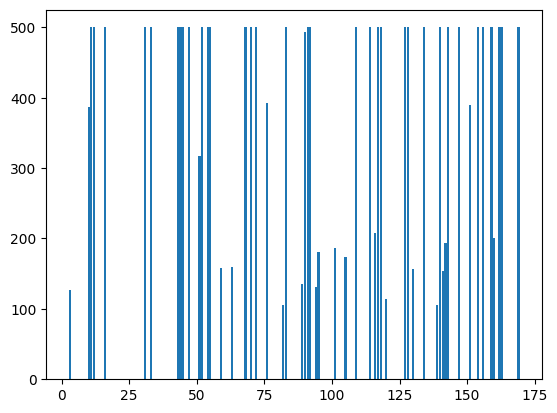

21472

In [27]:
import matplotlib.pyplot as plt

id_counts = bsmp['PROSODY_ID'].value_counts()
id_counts_sorted = id_counts.sort_index()

plt.bar(id_counts_sorted.index, id_counts_sorted)
plt.show()
records = len(bsmp)
records

#Model

In [28]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchtext import vocab as Vocab
import collections
from torch.nn.utils.rnn import pad_sequence
from transformers import AutoTokenizer


class processed_dataset(Dataset):
    def __init__(self, data, vocab):
        self.tokenized_data = [[vocab.stoi[word.lower()] for word in self.tokenize_sent(data_tuple[0])] for data_tuple in data]
        self.labels = [data_tuple[1] for data_tuple in data]
        assert len(self.labels) == len(self.tokenized_data)

    def tokenize_sent(self, sent):
        return [word for word in sent.split(' ')]



    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tokenized_data[idx], self.labels[idx]


class processed_dataset_bert(Dataset):
    def __init__(self, data, bert_type):
        tokenizer = AutoTokenizer.from_pretrained(bert_type)
        self.texts = []
        self.labels = []
        for text, label in data:
            self.texts.append(torch.tensor(tokenizer.encode(text, max_length=128, truncation=True)))
            self.labels.append(label)
        assert len(self.texts) == len(self.labels)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]


class packDataset_util():
    def __init__(self, vocab_target_set):
        self.vocab = self.get_vocab(vocab_target_set)

    def fn(self, data):
        labels = torch.tensor([item[1] for item in data])
        lengths = [len(item[0]) for item in data]
        texts = [torch.tensor(item[0]) for item in data]
        padded_texts = pad_sequence(texts, batch_first=True, padding_value=0)

        return padded_texts, lengths, labels

    def get_loader(self, data, shuffle=True, batch_size=32):
        dataset = processed_dataset(data, self.vocab)
        loader = DataLoader(dataset=dataset, shuffle=shuffle, batch_size=batch_size, collate_fn=self.fn)
        return loader

    def tokenize_sent(self, sent):
        return [word for word in sent.split(' ')]


    def get_vocab(self, target_set):
        tokenized_data = [[word.lower() for word in self.tokenize_sent(data_tuple[0])] for data_tuple in target_set]
        counter = collections.Counter([word for review in tokenized_data for word in review])
        vocab = Vocab.Vocab(counter, min_freq=3)
        return vocab


class packDataset_util_bert():
    def __init__(self, bert_type):
        self.bert_type = bert_type

    def fn(self, data):
        texts = []
        labels = []
        for text, label in data:
            texts.append(text)
            labels.append(label)
        labels = torch.tensor(labels)
        padded_texts = pad_sequence(texts, batch_first=True, padding_value=0)
        attention_masks = torch.zeros_like(padded_texts).masked_fill(padded_texts != 0, 1)
        return padded_texts, attention_masks, labels


    def get_loader(self, data, shuffle=True, batch_size=32):
        dataset = processed_dataset_bert(data, self.bert_type)
        loader = DataLoader(dataset=dataset, shuffle=shuffle, batch_size=batch_size, collate_fn=self.fn)
        return loader

In [30]:
packDataset_util = packDataset_util_bert("HooshvareLab/bert-base-parsbert-uncased")

In [31]:
import math
train=[]
for i in range(0, math.floor(records * 0.8)):
  train.append((bsmp["VERSE1"][i], bsmp["PROSODY_ID"][i]))
  train.append((bsmp["VERSE2"][i], bsmp["PROSODY_ID"][i]))
len(train)


34354

In [32]:
test=[]
for i in range(math.floor(records * 0.8), records):
  test.append((bsmp["VERSE1"][i],bsmp["PROSODY_ID"][i]))
  test.append((bsmp["VERSE2"][i],bsmp["PROSODY_ID"][i]))
len(test)

8590

In [33]:
train_loader = packDataset_util.get_loader(train, shuffle=False, batch_size=128)
test_loader = packDataset_util.get_loader(test, shuffle=False, batch_size=128)

In [34]:
import torch
import torch.nn as nn
import transformers
import os
from torch.nn.utils import clip_grad_norm_

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [36]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-uncased"
                                                     , num_labels=176).to(device) # because we have 11 classes

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Optional
if you load a trained model

In [37]:
# Only if you want to resume your previous epochs
# model.load_state_dict(torch.load("your_checkpoint.pth"))

In [38]:
criterion = nn.CrossEntropyLoss()

In [39]:
BATCH_SIZE = 128
weight_decay = float(0)
lr = 1e-5
EPOCHS = 10
warm_up_epochs = 3

In [40]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

In [41]:
scheduler = transformers.get_linear_schedule_with_warmup(optimizer,
                                        num_warmup_steps=warm_up_epochs * len(train_loader),
                                        num_training_steps=(warm_up_epochs + EPOCHS) * len(train_loader))


In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import warnings
def evaluaion(loader):
    warnings.filterwarnings('ignore')
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for padded_text, attention_masks, labels in loader:
            padded_text = padded_text.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)
            output = model(padded_text, attention_masks)[0]  # batch_size, 2
            _, flag = torch.max(output, dim=1)

            # add true and predicted labels for calculating F1 score
            y_true += labels.cpu().numpy().tolist()
            y_pred += flag.cpu().numpy().tolist()

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        cm = confusion_matrix(y_true, y_pred)
        return acc, f1, precision, recall, cm

In [43]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3A20-2AB6

 Directory of C:\Users\Turbo\Desktop\persian_poem_prosody_research\RES\parsbert

03/19/2024  03:34 AM    <DIR>          .
03/19/2024  03:34 AM    <DIR>          ..
03/15/2024  06:46 PM    <DIR>          .ipynb_checkpoints
03/17/2024  01:30 AM           364,412 parsbert-1336930.html
03/17/2024  01:15 AM       651,990,229 parsbert-1336930.pth
03/19/2024  02:58 AM           360,791 parsbert-138520.html
03/19/2024  02:56 AM       651,990,024 parsbert-138520.pth
03/19/2024  02:18 AM           360,888 parsbert-243686.html
03/19/2024  02:14 AM       651,990,024 parsbert-243686.pth
03/19/2024  03:33 AM           359,601 parsbert-38293.html
03/19/2024  03:33 AM       651,989,819 parsbert-38293.pth
03/15/2024  07:54 PM           356,703 parsbert-5500.html
03/15/2024  07:39 PM       651,989,614 parsbert-5500.pth
03/19/2024  01:09 AM           361,692 parsbert-726511.html
03/19/2024  12:59 AM       651,990,024 parsbert-726511.pth

In [44]:
from timeit import default_timer as timer

last_train_avg_loss = 100000
epoch_times = []
for epoch in range(warm_up_epochs + EPOCHS): # you can change number of epochs
    start_time = timer()
    model.train()
    total_loss = 0
    for padded_text, attention_masks, labels in train_loader:
        padded_text = padded_text.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)
        output = model(padded_text, attention_masks)[0]
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    end_time = timer()

    avg_loss = total_loss / len(train_loader)
    print(f'finish training, avg loss: {avg_loss}/{last_train_avg_loss}, begin to evaluate:')
    test_acc, _, _, _, _ = evaluaion(test_loader)
    et = end_time - start_time
    epoch_times.append(et)
    print(f'test accuracy: {test_acc}, Epoch time = {et}')
    last_train_avg_loss = avg_loss
    print('*' * 89)

torch.save(model.state_dict(), f"parsbert-{records}.pth")
acc, f1, precision, recall, cm = evaluaion(test_loader)
train_acc, train_f1, train_precision, train_recall, train_cm = evaluaion(train_loader)
print('*' * 89)
print(f'train time = {sum(epoch_times)}')
print(f'finish all, final test accuracy: {acc}, F1 score: {f1}, Precision: {precision}, Recall: {recall}, Confusion Matrix: {cm}')
print(f'finish all, final train accuracy: {train_acc}, F1 score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}, Confusion Matrix: {train_cm}')

finish training, avg loss: 4.9457078440925/100000, begin to evaluate:
test accuracy: 0.03841676367869616, Epoch time = 24.06912719999673
*****************************************************************************************
finish training, avg loss: 4.2531723984998395/4.9457078440925, begin to evaluate:
test accuracy: 0.06239813736903376, Epoch time = 24.483532199985348
*****************************************************************************************
finish training, avg loss: 3.7270074909947617/4.2531723984998395, begin to evaluate:
test accuracy: 0.08928987194412107, Epoch time = 24.601136300014332
*****************************************************************************************
finish training, avg loss: 3.3863340735878644/3.7270074909947617, begin to evaluate:
test accuracy: 0.11804423748544819, Epoch time = 24.966600899992045
*****************************************************************************************
finish training, avg loss: 3.186899279129993/3.